In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('./data/breast_cancer.csv')

In [50]:
#highly correlated columns to remove
to_drop = ['worst radius', 'worst texture', 'worst perimeter', 'worst area','worst concave points','mean concave points','radius error','area error','mean radius','mean perimeter']
df.drop(to_drop,axis=1,inplace=True)

In [51]:
## Independent and dependent features
X = df.drop('target',axis=1)
y = df['target']

In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    0
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [53]:
#rectifying target imbalance
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy="auto")
X , y = resampler.fit_resample(X, y)

In [54]:
X[y==1].shape , X[y==0].shape

((339, 20), (339, 20))

In [55]:
#All features in X are numerical in nature
numerical_cols = X.columns
numerical_cols

Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [56]:
# since all the features are only numerical in nature creating only numerical pipeline
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline , numerical_cols)
])

In [58]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [59]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [60]:
X_train.shape , X_test.shape

((474, 20), (204, 20))

In [61]:
X_train.head()

,numerical_pipeline__mean texture,numerical_pipeline__mean area,numerical_pipeline__mean smoothness,numerical_pipeline__mean compactness,numerical_pipeline__mean concavity,numerical_pipeline__mean symmetry,numerical_pipeline__mean fractal dimension,numerical_pipeline__texture error,numerical_pipeline__perimeter error,numerical_pipeline__smoothness error,numerical_pipeline__compactness error,numerical_pipeline__concavity error,numerical_pipeline__concave points error,numerical_pipeline__symmetry error,numerical_pipeline__fractal dimension error,numerical_pipeline__worst smoothness,numerical_pipeline__worst compactness,numerical_pipeline__worst concavity,numerical_pipeline__worst symmetry,numerical_pipeline__worst fractal dimension
0,0.525285,0.296663,-0.156741,0.552338,0.664635,-0.295889,-0.145954,0.028350,-0.228866,-0.194328,0.767455,0.715476,0.835760,-0.541002,0.279123,0.041444,0.909853,1.038119,-0.133680,0.336949
1,-0.303608,-0.815201,-0.287516,-0.948538,-0.921023,0.017782,-0.483162,-0.709978,-0.233920,-0.222907,-0.929025,-0.802626,-0.534796,0.313407,-1.021859,-0.724652,-1.046339,-1.058726,-0.324837,-1.101611
2,1.642952,1.514848,1.250063,3.056954,1.722695,2.063612,1.602054,-0.859909,0.583132,-0.949207,1.197387,0.199041,0.527774,-0.296442,0.659337,0.665409,2.871203,1.724801,1.744711,2.348725
3,-1.797090,-1.036447,0.197212,-0.670311,-1.006048,-0.106207,0.421286,-1.263221,-0.864892,-0.461251,-0.756333,-0.953391,-0.902238,-0.123610,-0.622827,-0.002543,-0.686057,-1.034945,-0.024616,-0.430878
4,-1.147437,-0.818037,0.296988,-0.622595,-0.720057,0.196473,-0.149869,-0.344336,-0.705260,-0.126614,-0.835196,-0.474711,-0.390012,-0.445817,-0.441728,0.205064,-0.726821,-0.595465,-0.440659,-0.383628


In [62]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components=X_train.shape[1])
covar_matrix.fit(X_train)

PCA(n_components=20)

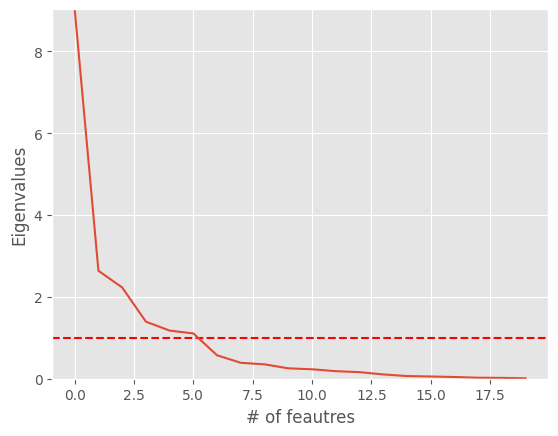

In [63]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.ylabel('Eigenvalues')
plt.xlabel('# of feautres')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.axhline(y=1,color = 'r' , linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [64]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [65]:
pca.explained_variance_ratio_*100

array([45.06515225, 13.16253476, 11.12646544,  6.95690434,  5.86783058])

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score , roc_auc_score , f1_score

In [67]:
# a function to evaluate the model
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    roc_score = roc_auc_score(true, predicted)
    f_1_score = f1_score(true, predicted)

    return accuracy , roc_score , f_1_score

In [69]:
models={
    'LogisticRegression':LogisticRegression(),
    'RidgeClassifier':RidgeClassifier(),
    'BernoulliNB':BernoulliNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier()
}
model_list=[]
roc=[]
acc = []
f1 = []
performance = []
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy , roc_score  , f_1_score =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    roc.append(roc_score)
    acc.append(accuracy)
    f1.append(f_1_score)
    performance.append((list(models.keys())[i] , accuracy ))


    print('Model Training Performance')
    print("ROC:",roc_score)
    print("Accuracy:",accuracy)

    
    print('='*35)
    print('\n')

print("Best Model" , sorted(performance , key = lambda x: x[1])[-1])
model = models[sorted(performance , key = lambda x: x[1])[-1][0]]
print(model)

metrics = pd.DataFrame({"models": model_list , "accuracy" : acc , "roc_auc_score": roc , "f1_score" : f1})
print(metrics.sort_values('accuracy',ascending=False))


LogisticRegression
Model Training Performance
ROC: 0.9704861111111112
Accuracy: 0.9705882352941176


RidgeClassifier
Model Training Performance
ROC: 0.9484953703703705
Accuracy: 0.946078431372549


BernoulliNB
Model Training Performance
ROC: 0.8599537037037037
Accuracy: 0.8578431372549019


DecisionTreeClassifier
Model Training Performance
ROC: 0.9212962962962963
Accuracy: 0.9215686274509803


KNeighborsClassifier
Model Training Performance
ROC: 0.9415509259259259
Accuracy: 0.9411764705882353


AdaBoostClassifier
Model Training Performance
ROC: 0.9357638888888888
Accuracy: 0.9362745098039216


GradientBoostingClassifier
Model Training Performance
ROC: 0.9606481481481483
Accuracy: 0.9607843137254902


BaggingClassifier
Model Training Performance
ROC: 0.9658564814814815
Accuracy: 0.9656862745098039


RandomForestClassifier
Model Training Performance
ROC: 0.9508101851851851
Accuracy: 0.9509803921568627


SVC
Model Training Performance
ROC: 0.9658564814814815
Accuracy: 0.9656862745098039



In [70]:
model

LogisticRegression()